Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data and store in a dictionary
stock_data = {}

for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Create lists of DataFrames and corresponding company names
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company_name column to each DataFrame
for stock, com_name in zip(tech_list, company_name):
    stock_data[stock]["company_name"] = com_name

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(stock_data.values(), axis=0)

# Display the last 10 rows
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-09,166.399994,168.550003,165.850006,166.940002,166.940002,36401000,AMAZON
2024-08-12,168.139999,168.550003,166.110001,166.800003,166.800003,30072800,AMAZON
2024-08-13,167.809998,171.039993,167.100006,170.229996,170.229996,39237900,AMAZON
2024-08-14,172.110001,172.279999,168.860001,170.100006,170.100006,28843800,AMAZON
2024-08-15,174.860001,177.910004,173.990005,177.589996,177.589996,51698500,AMAZON
2024-08-16,177.039993,178.339996,176.259995,177.059998,177.059998,31489200,AMAZON
2024-08-19,177.639999,178.300003,176.160004,178.220001,178.220001,31129800,AMAZON
2024-08-20,177.919998,179.009995,177.429993,178.880005,178.880005,26255200,AMAZON
2024-08-21,179.919998,182.389999,178.889999,180.110001,180.110001,35109100,AMAZON


In [3]:
# Save the DataFrame to a CSV file
df.to_csv('tech_stocks_data.csv')


## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [4]:
# Summary Stats
stock_data['AAPL'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,189.206245,190.983044,187.623913,189.392451,188.846510,6.001111e+07
std,17.473359,17.741776,17.116197,17.464895,17.616971,2.499455e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,1.876764e+07
25%,175.520004,177.490005,173.860001,175.740005,174.845306,4.641400e+07
50%,185.820007,187.050003,183.889999,185.850006,185.147430,5.366560e+07
75%,195.020004,196.270004,193.589996,194.500000,193.973953,6.593480e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [5]:
# General info
stock_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-08-22 to 2024-08-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

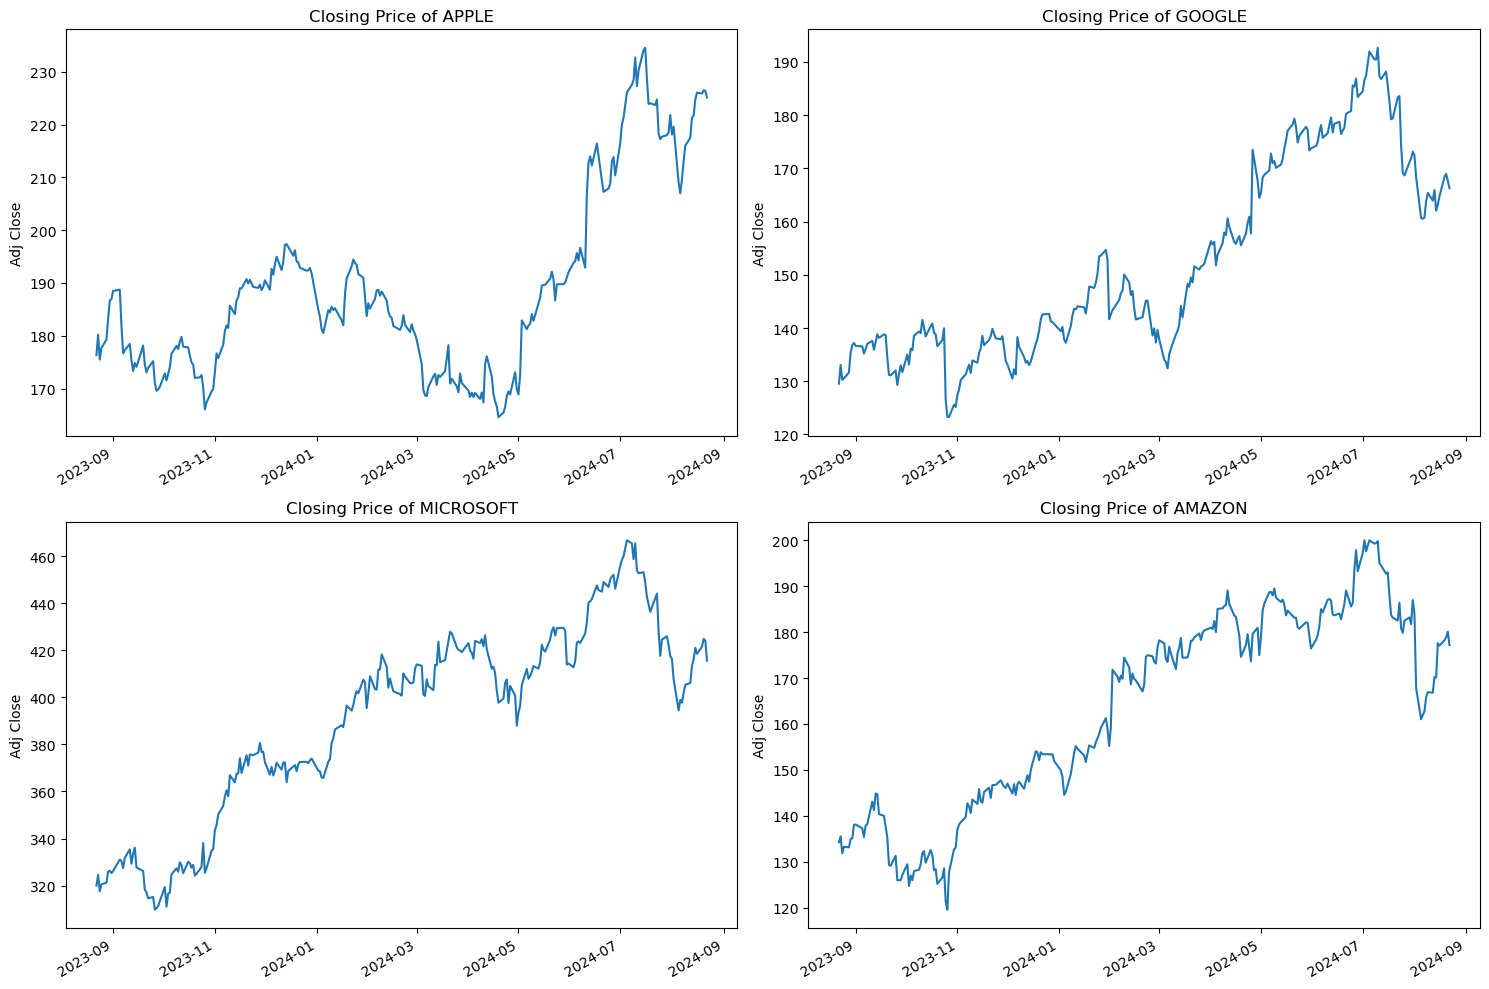

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, name) in enumerate(zip(tech_list, company_name), 1):
    plt.subplot(2, 2, i)
    stock_data[stock]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {name}")
    
plt.tight_layout()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

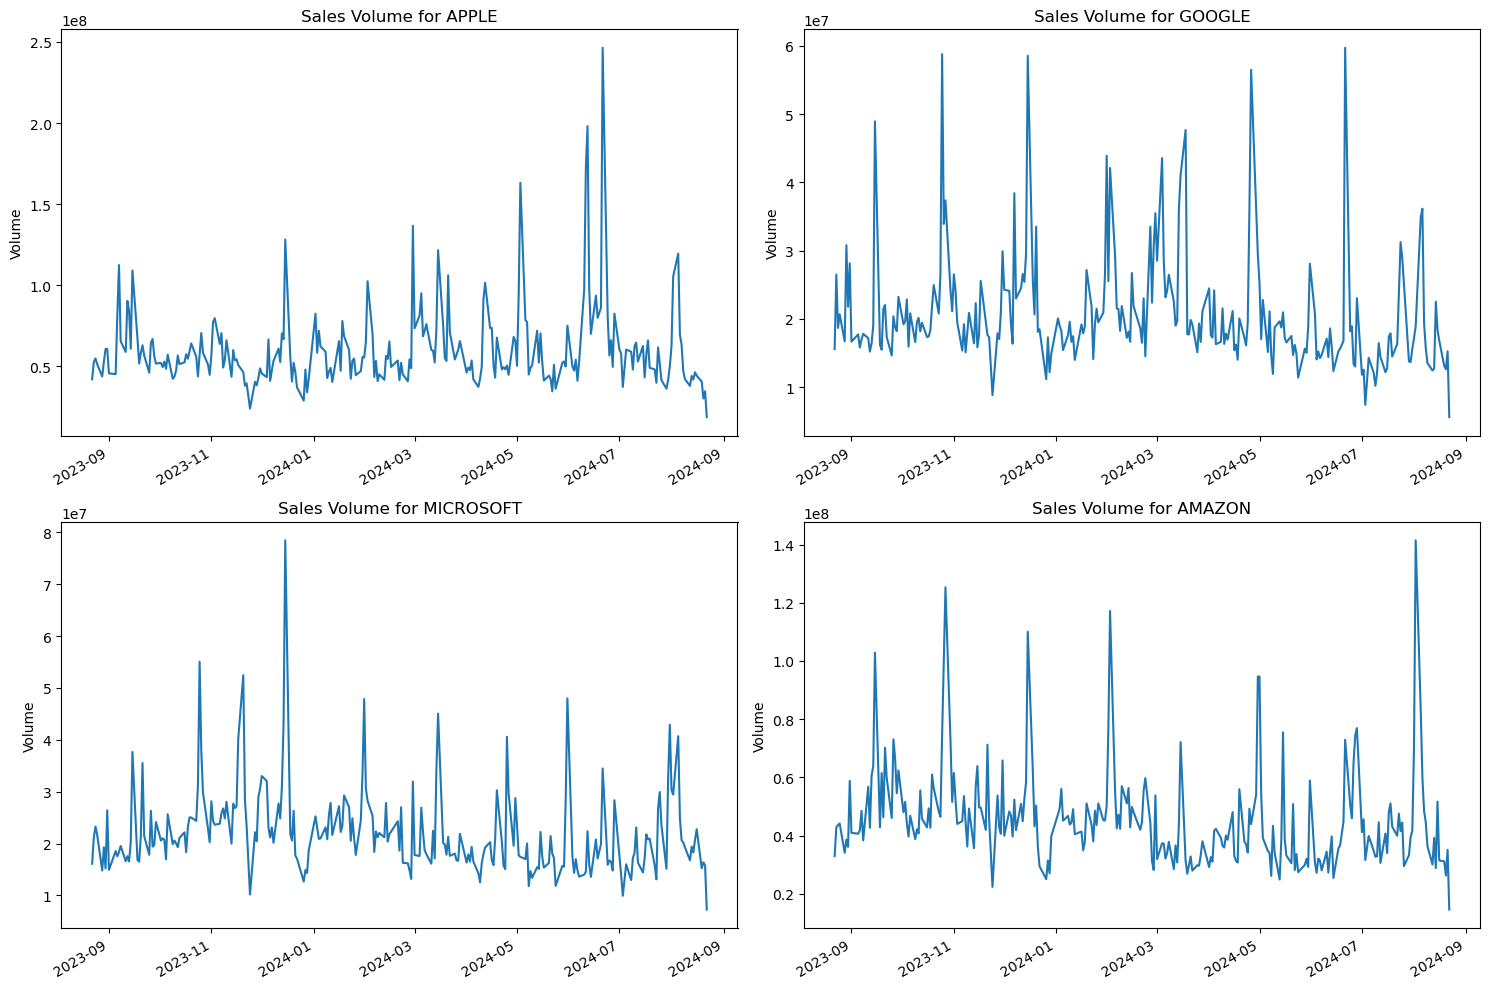

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, name) in enumerate(zip(tech_list, company_name), 1):
    # Debugging print statements

    plt.subplot(2, 2, i)
    stock_data[stock]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {name}")
    
plt.tight_layout()


A high volume typically indicates strong investor interest and can suggest a potential trend or the strength of an existing trend.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

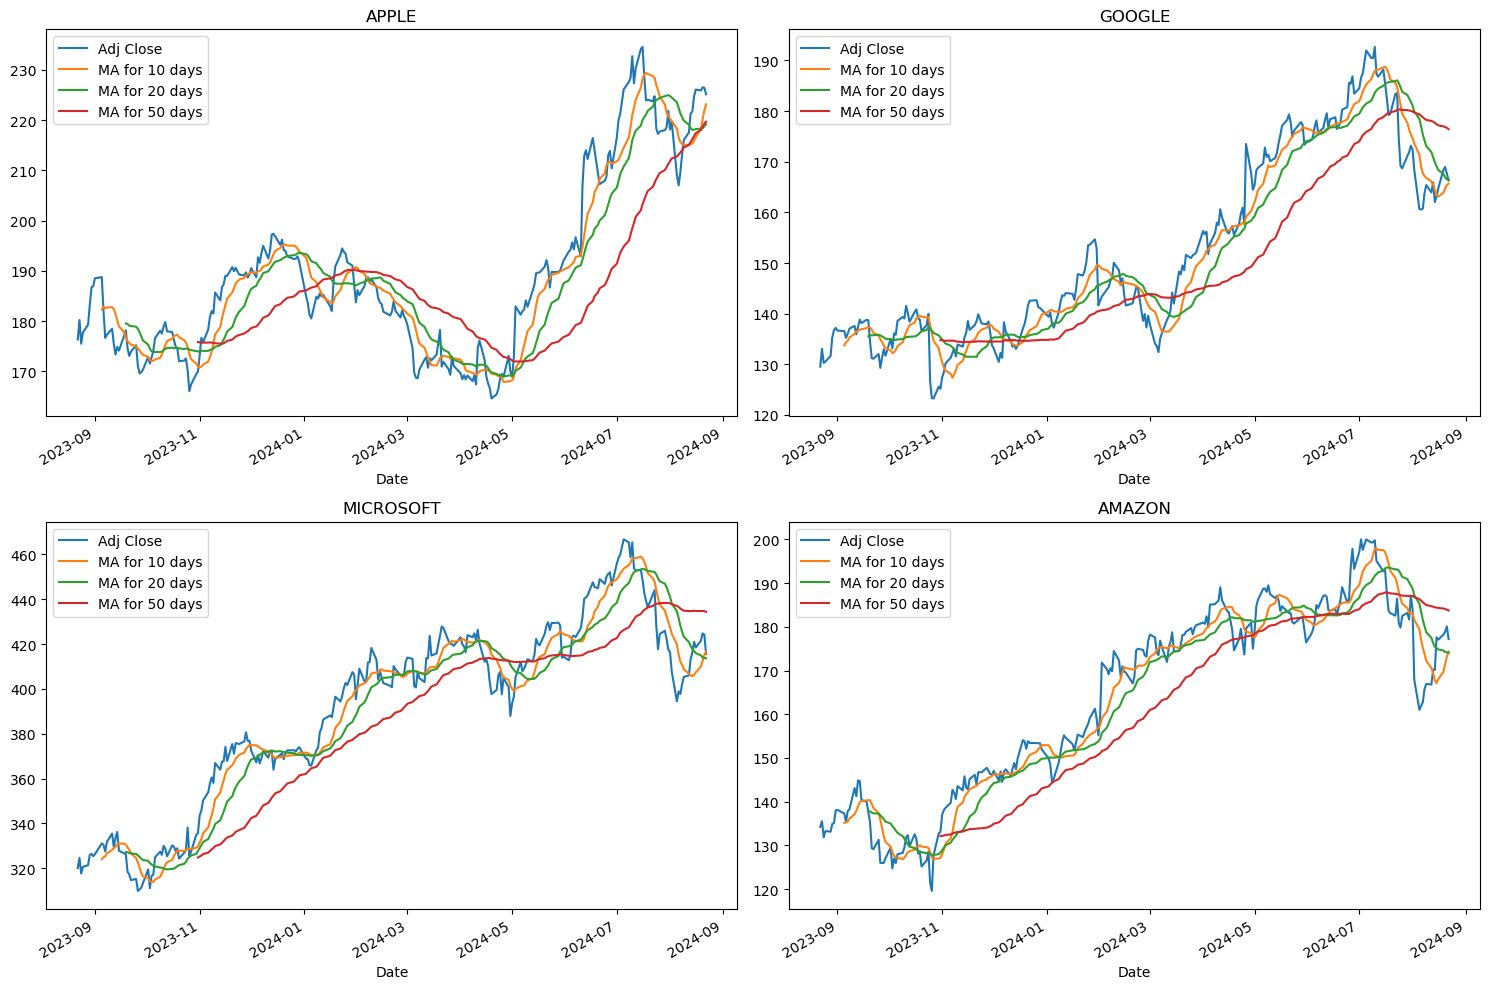

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for stock in tech_list:
        column_name = f"MA for {ma} days"
        stock_data[stock][column_name] = stock_data[stock]['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data['AAPL'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

stock_data['GOOG'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

stock_data['MSFT'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

stock_data['AMZN'][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.


Variability (Standard Deviation) and Risk (Annualized Volatility) of Daily Returns:
AAPL:
  Variability (Standard Deviation): 0.0143
  Risk (Annualized Volatility): 0.2274
GOOG:
  Variability (Standard Deviation): 0.0175
  Risk (Annualized Volatility): 0.2772
MSFT:
  Variability (Standard Deviation): 0.0126
  Risk (Annualized Volatility): 0.2000
AMZN:
  Variability (Standard Deviation): 0.0179
  Risk (Annualized Volatility): 0.2835


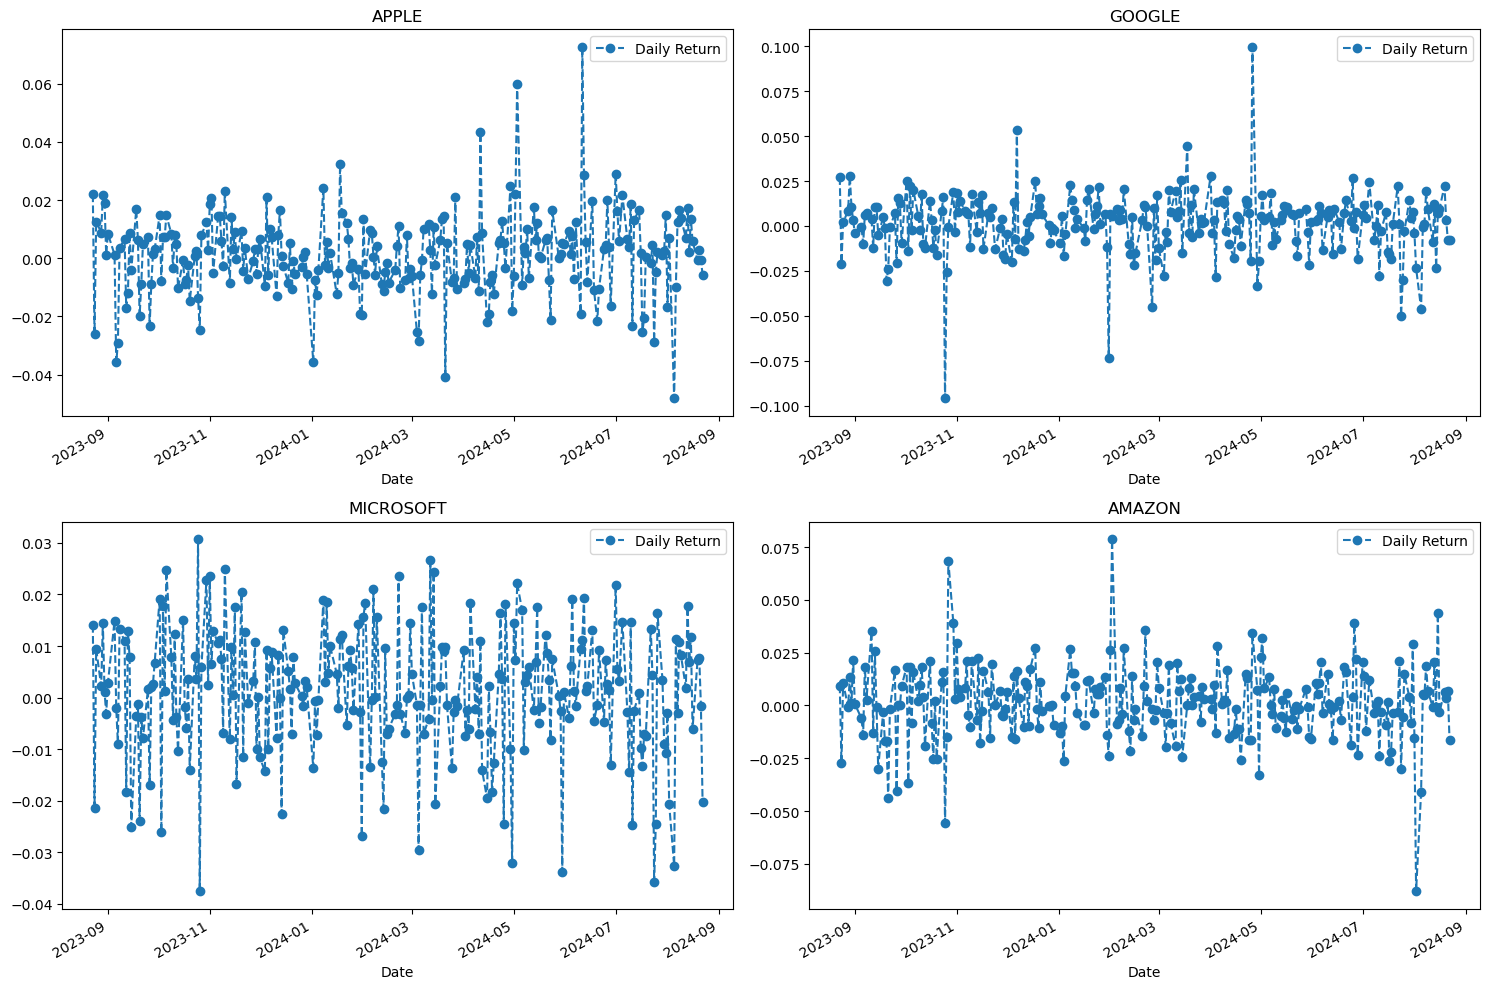

In [9]:
# We'll use pct_change to find the percent change for each day
for stock in tech_list:
    stock_data[stock]['Daily Return'] = stock_data[stock]['Adj Close'].pct_change()


# Calculate variability (standard deviation) and risk (annualized volatility)
variability = {}
risk = {}

for stock in tech_list:
    variability[stock] = stock_data[stock]['Daily Return'].std()
    risk[stock] = stock_data[stock]['Daily Return'].std() * (252 ** 0.5)  # Annualized volatility (252 trading days in a year)

# Print variability and risk
print("\nVariability (Standard Deviation) and Risk (Annualized Volatility) of Daily Returns:")
for stock in tech_list:
    print(f"{stock}:")
    print(f"  Variability (Standard Deviation): {variability[stock]:.4f}")
    print(f"  Risk (Annualized Volatility): {risk[stock]:.4f}")

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stock_data['AAPL']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

stock_data['GOOG']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

stock_data['MSFT']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

stock_data['AMZN']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Variability measures how much the returns of an asset fluctuate around the average return. It's a way to understand how stable or unstable the asset's returns are.

Risk refers to the potential for loss or gain and is often measured by variability (standard deviation) or volatility. Higher variability indicates higher risk because the asset's returns are more unpredictable.

Amazon (AMZN) is the most volatile and therefore the riskiest stock among those analyzed. If your project involves risk assessment or portfolio diversification, this insight is crucial.

Microsoft (MSFT) is the least volatile and therefore presents lower risk, which might be suitable for more conservative investment strategies.

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

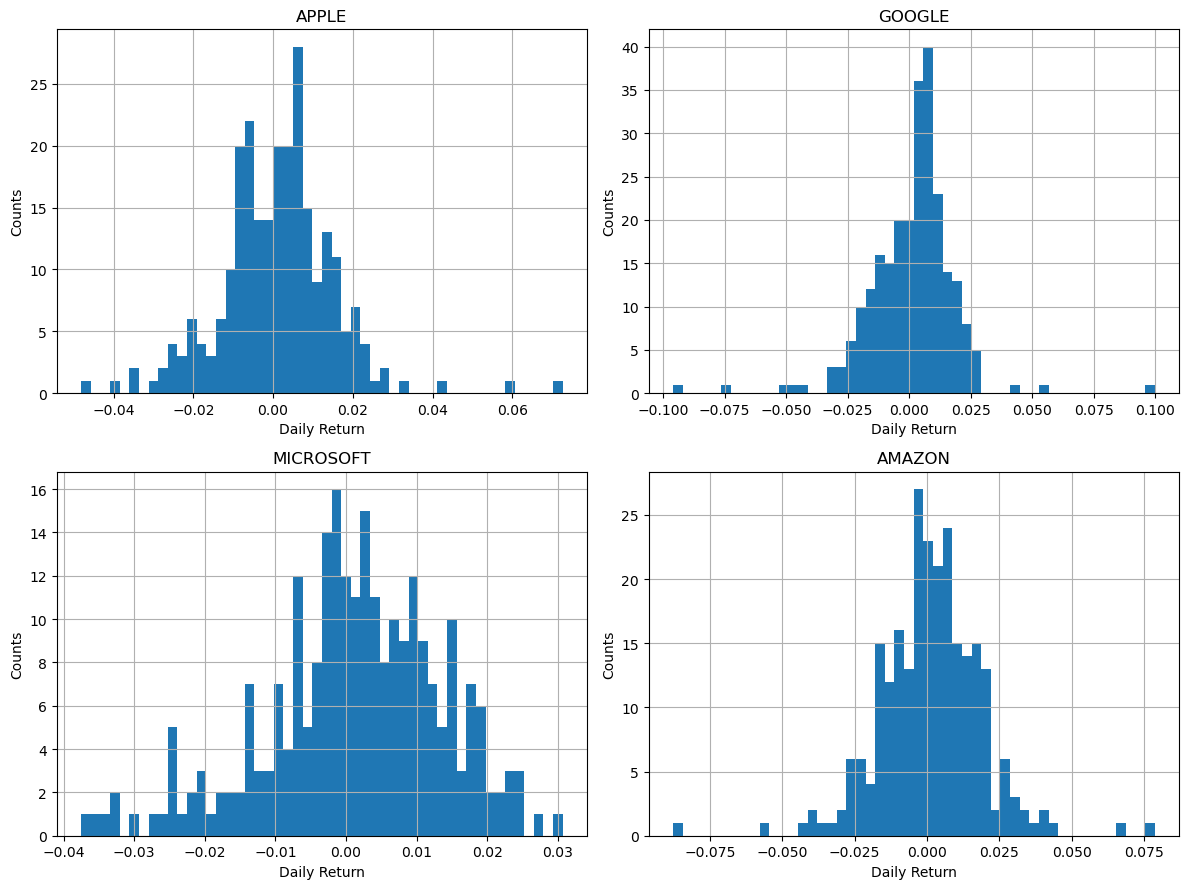

In [10]:
plt.figure(figsize=(12, 9))

for i, stock in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    stock_data[stock]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


Variability (Standard Deviation) and Risk (Annualized Volatility) of Daily Returns:
AAPL:
  Variability (Standard Deviation): 0.0143
  Risk (Annualized Volatility): 0.2274
GOOG:
  Variability (Standard Deviation): 0.0175
  Risk (Annualized Volatility): 0.2772
MSFT:
  Variability (Standard Deviation): 0.0126
  Risk (Annualized Volatility): 0.2000
AMZN:
  Variability (Standard Deviation): 0.0179
  Risk (Annualized Volatility): 0.2835


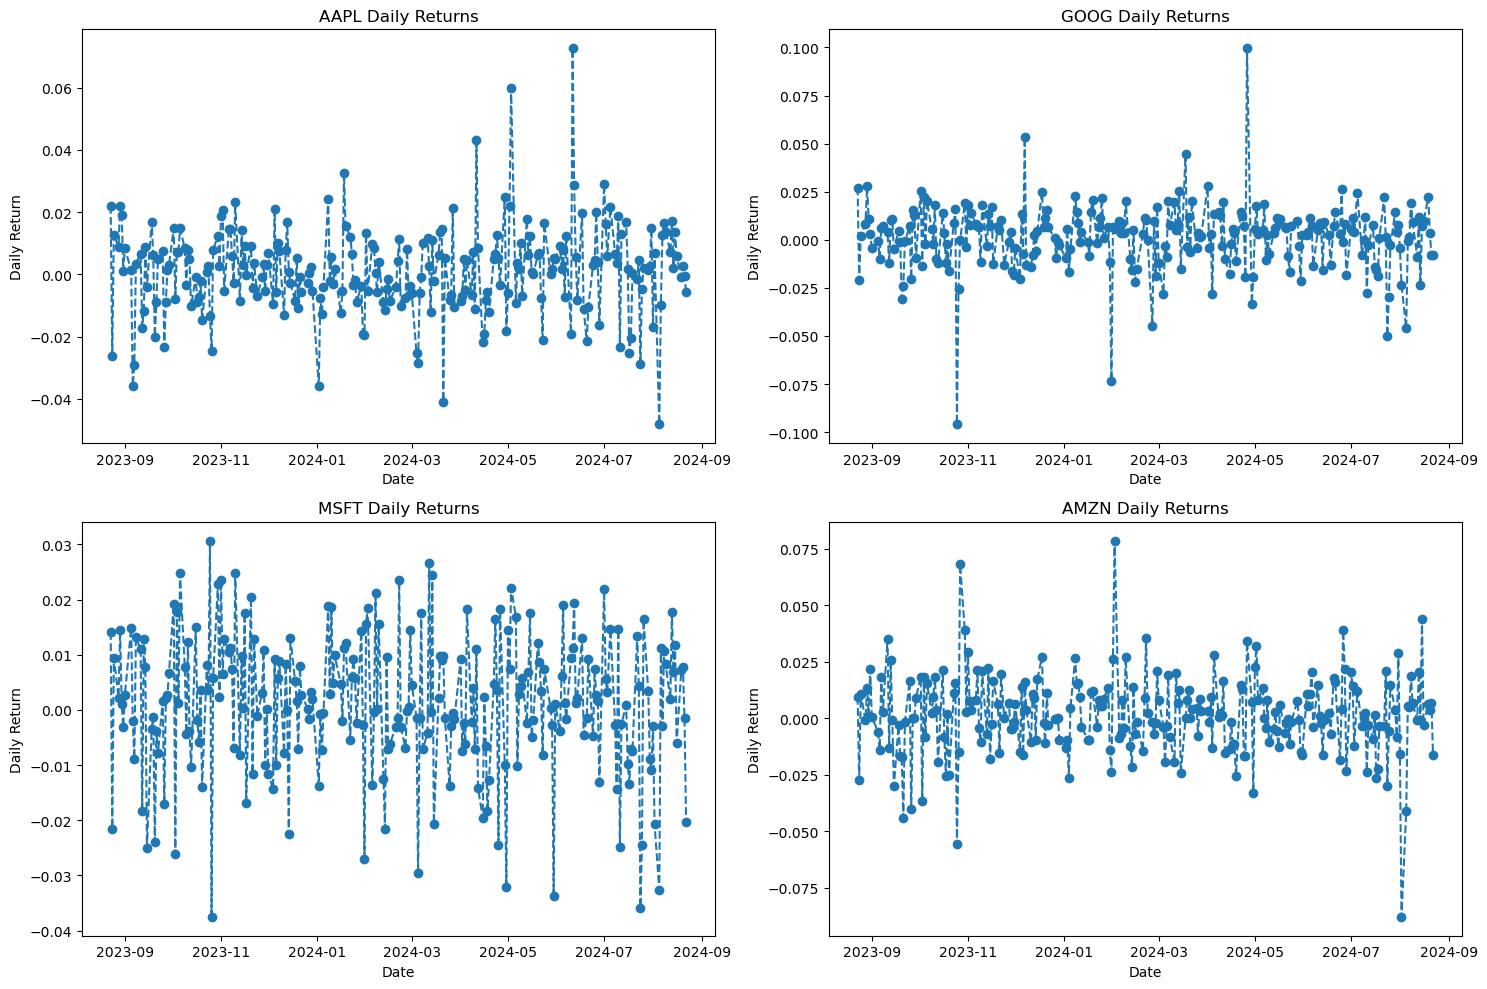

In [11]:

# Calculate variability (standard deviation) and risk (annualized volatility)
variability = {}
risk = {}

for stock in tech_list:
    variability[stock] = stock_data[stock]['Daily Return'].std()
    risk[stock] = stock_data[stock]['Daily Return'].std() * (252 ** 0.5)  # Annualized volatility (252 trading days in a year)

# Print variability and risk
print("\nVariability (Standard Deviation) and Risk (Annualized Volatility) of Daily Returns:")
for stock in tech_list:
    print(f"{stock}:")
    print(f"  Variability (Standard Deviation): {variability[stock]:.4f}")
    print(f"  Risk (Annualized Volatility): {risk[stock]:.4f}")

# Optional: Plot the daily returns to visualize variability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, stock in enumerate(tech_list, 1):
    axes[(i-1)//2, (i-1)%2].plot(stock_data[stock]['Daily Return'], linestyle='--', marker='o')
    axes[(i-1)//2, (i-1)%2].set_title(f'{stock} Daily Returns')
    axes[(i-1)//2, (i-1)%2].set_xlabel('Date')
    axes[(i-1)//2, (i-1)%2].set_ylabel('Daily Return')

plt.tight_layout()
plt.show()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [12]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define your tech stock list, start and end dates
tech_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']  # Example tech stock list
# Download data
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets.head())


[*********************100%%**********************]  4 of 4 completed

Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2023-08-22       NaN       NaN       NaN       NaN
2023-08-23  0.021949  0.009460  0.025488  0.014079
2023-08-24 -0.026171 -0.027155 -0.019566 -0.021498
2023-08-25  0.012643  0.010771  0.000771  0.009407
2023-08-28  0.008846 -0.000900  0.008700  0.002229


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

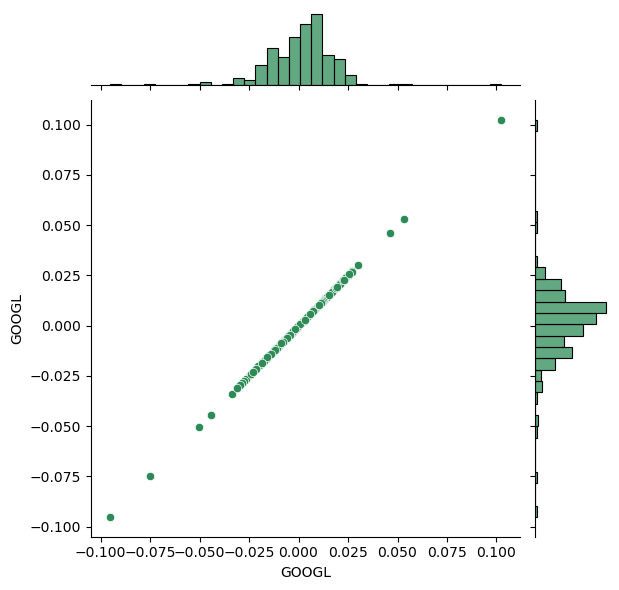

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_rets, kind='scatter', color='seagreen')

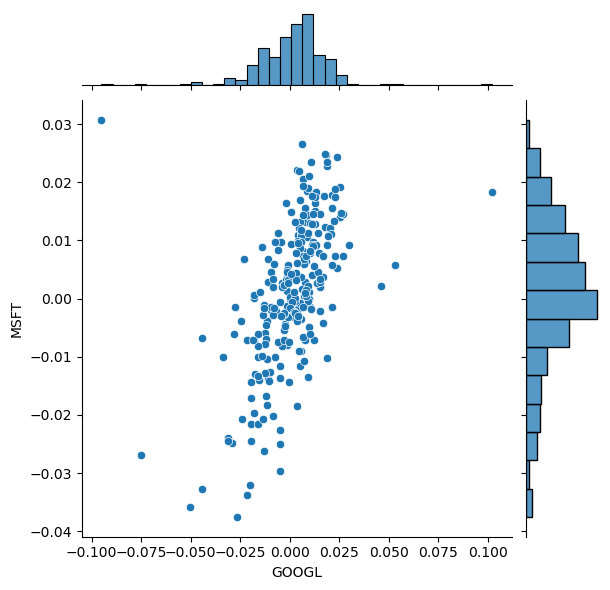

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOGL', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

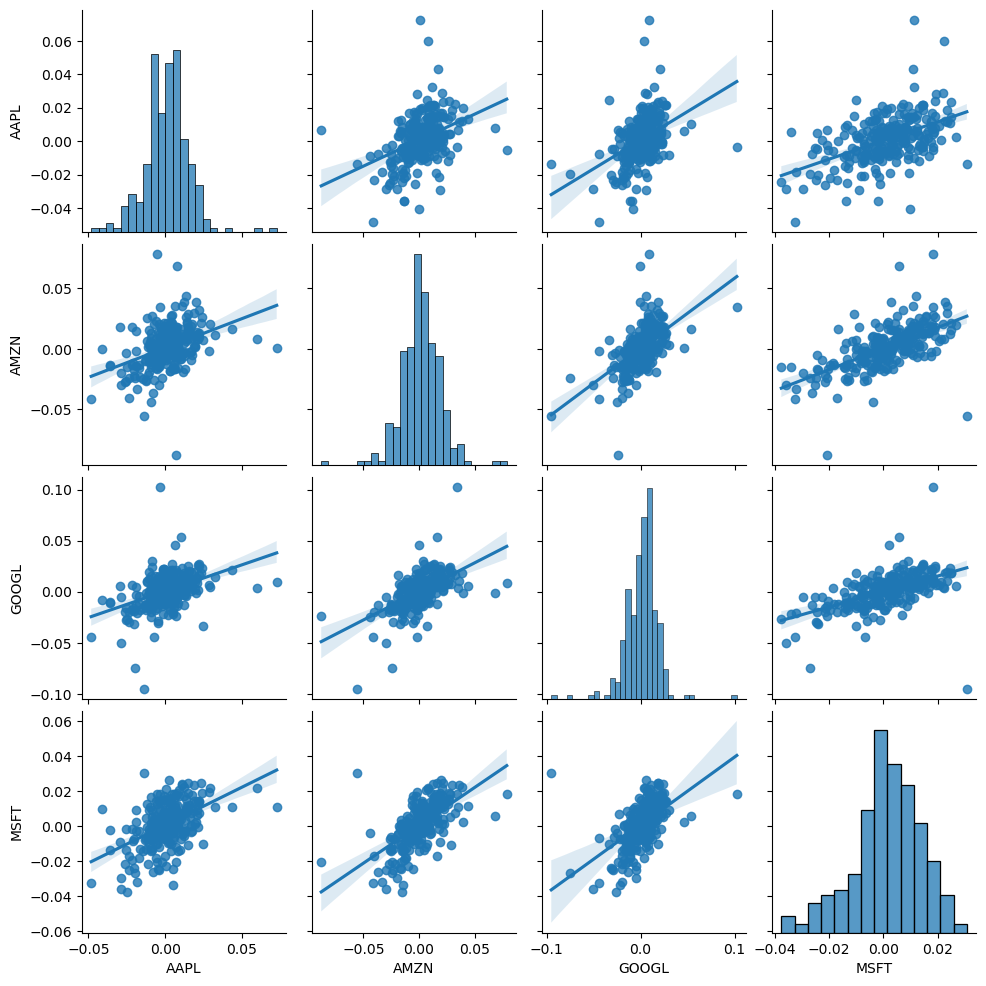

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

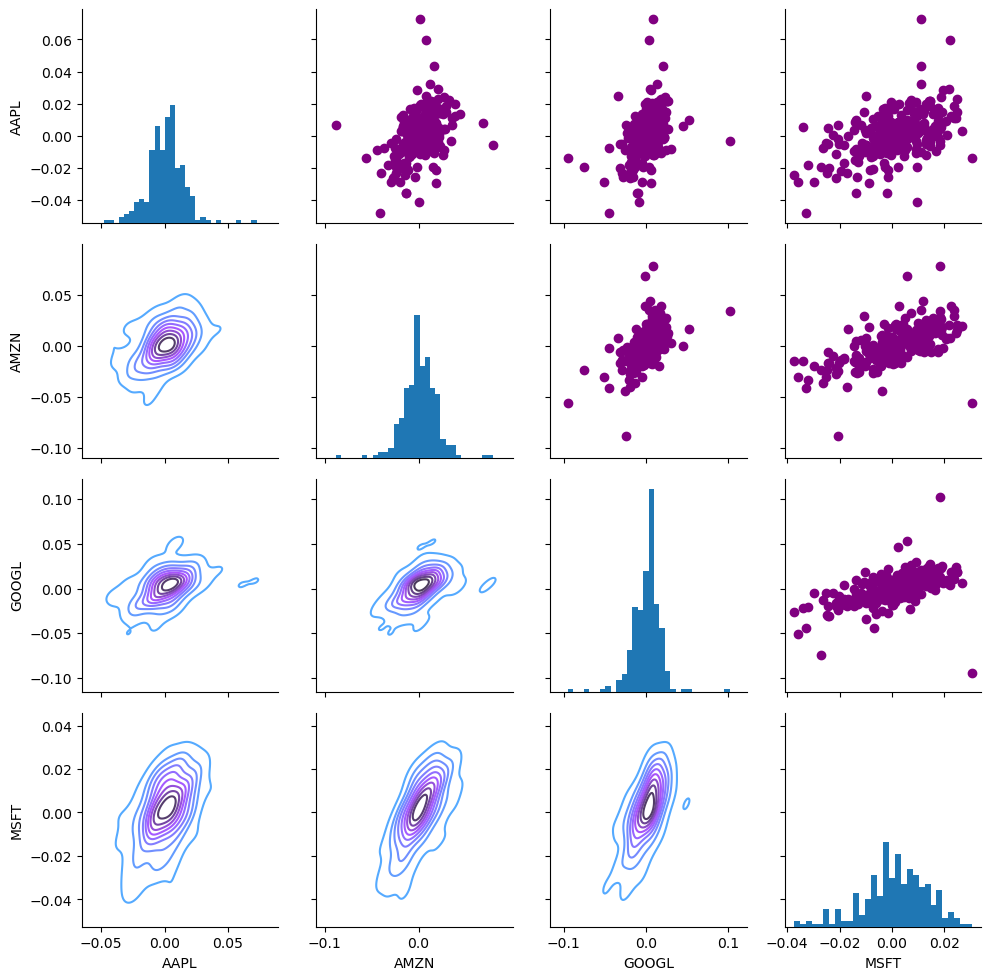

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

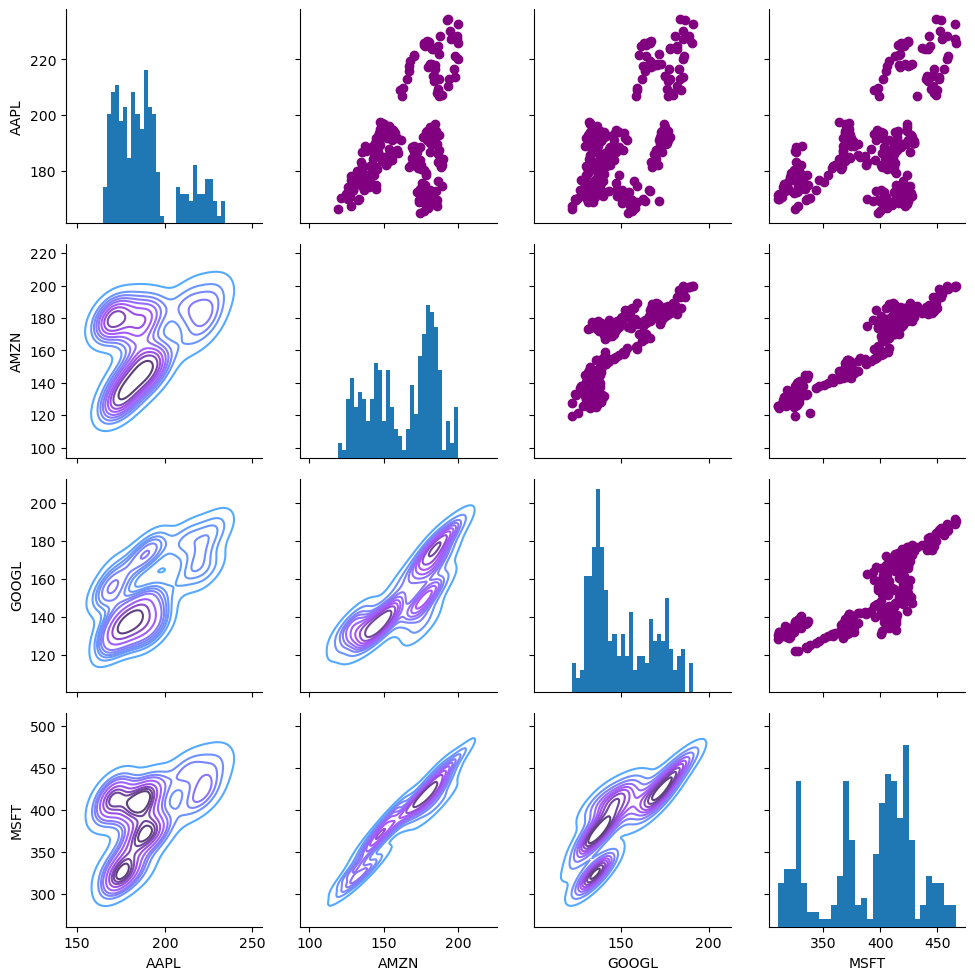

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

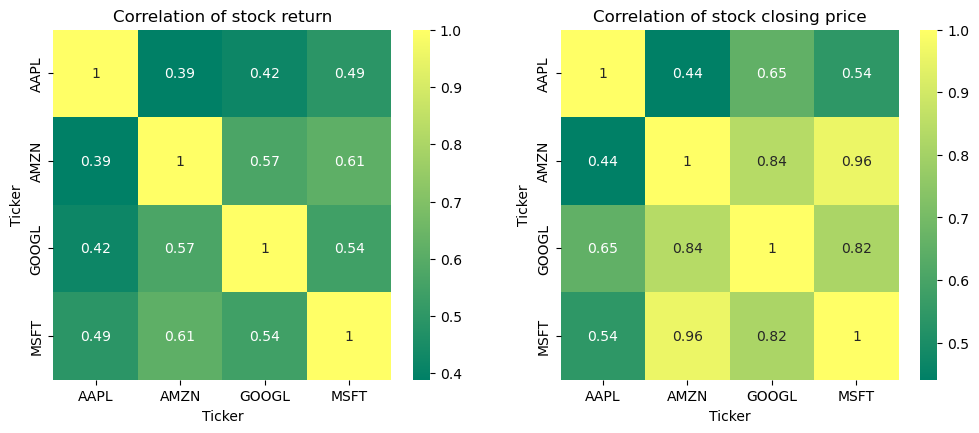

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

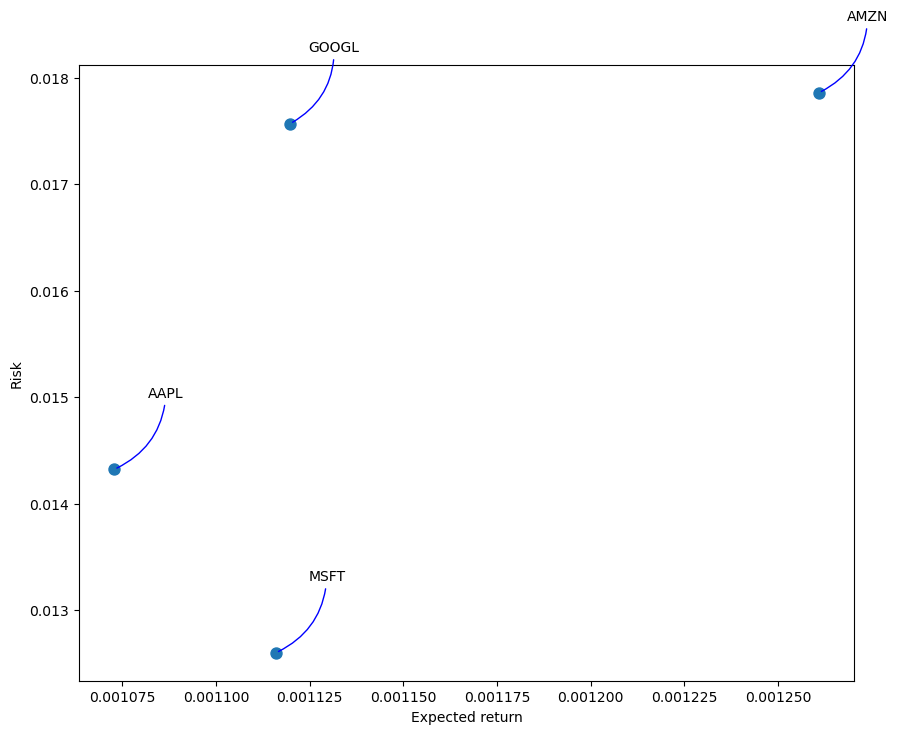

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


# 6. Predicting the closing price stock price of APPLE inc:

In [20]:
import yfinance as yf
from datetime import datetime

# Get the stock quote using yfinance
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.402628   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.469278   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.607712   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.739511   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.719308   
...                ...         ...         ...         ...         ...   
2024-08-16  223.919998  226.830002  223.649994  226.050003  226.050003   
2024-08-19  225.720001  225.990005  223.039993  225.889999  225.889999   
2024-08-20  225.770004  227.169998  225.449997  226.509995  226.509995   
2024-08-21  226.520004  227.979996  225.050003  226.399994  226.399994   
2024-08-22  227.600006  228.339996  224.920105  225.089996  225.089996   

               Volume  
Date         

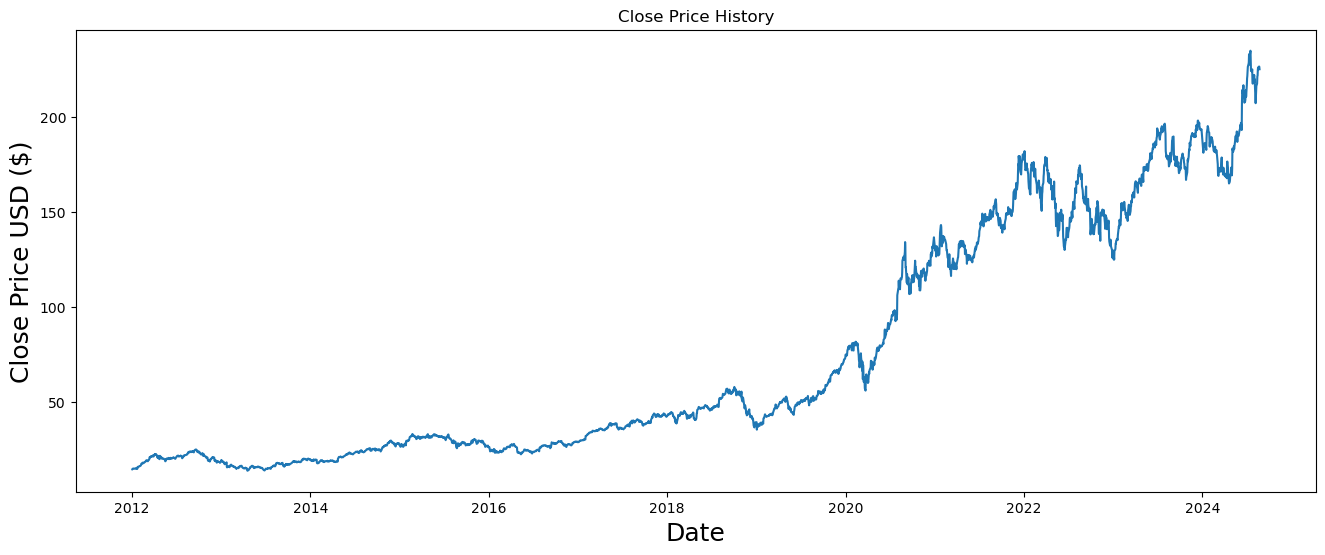

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len
# print(len(dataset))

2703

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.96237643],
       [0.9618784 ],
       [0.95594739]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))          # (number of samples, time steps, number of features)
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

Longer Sequences (e.g., 90): If you believe that the stock price has patterns or dependencies that span a longer period, using 90 time steps might help the model capture those longer-term dependencies.

Shorter Sequences (e.g., 60): If the stock price is more influenced by short-term fluctuations, a shorter window might suffice.

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to the end (2002 in your case)
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = []

# Loop through the test_data to create x_test and y_test
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])  # Use scaled data for y_test as well

# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)  # Convert y_test to numpy array as well

# Reshape the data to be 3D for LSTM input (samples, timesteps, features)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [26]:
x_test

array([[[0.58392282],
        [0.59945218],
        [0.6025761 ],
        ...,
        [0.61946372],
        [0.6239459 ],
        [0.61525311]],

       [[0.59945218],
        [0.6025761 ],
        [0.59275143],
        ...,
        [0.6239459 ],
        [0.61525311],
        [0.58193071]],

       [[0.6025761 ],
        [0.59275143],
        [0.59723368],
        ...,
        [0.61525311],
        [0.58193071],
        [0.56255302]],

       ...,

       [[0.7829517 ],
        [0.7969869 ],
        [0.79703222],
        ...,
        [0.95427223],
        [0.96029382],
        [0.9595694 ]],

       [[0.7969869 ],
        [0.79703222],
        [0.79839042],
        ...,
        [0.96029382],
        [0.9595694 ],
        [0.96237643]],

       [[0.79703222],
        [0.79839042],
        [0.80291792],
        ...,
        [0.9595694 ],
        [0.96237643],
        [0.9618784 ]]])

In [27]:
y_test

array([0.58193071, 0.56255302, 0.58179489, 0.59832031, 0.5996785 ,
       0.59528682, 0.57110999, 0.57260408, 0.56608447, 0.56318687,
       0.58423978, 0.56336801, 0.58161382, 0.58768066, 0.58817868,
       0.58605075, 0.60361747, 0.61348738, 0.62657185, 0.61303468,
       0.59243454, 0.64196539, 0.63109935, 0.61892037, 0.59347585,
       0.56563176, 0.56336801, 0.56581283, 0.56843879, 0.54747644,
       0.60180643, 0.61461926, 0.60819022, 0.61615859, 0.61049922,
       0.61923733, 0.62181797, 0.60696778, 0.61679244, 0.62082198,
       0.60742055, 0.58980859, 0.5759997 , 0.60705834, 0.60832604,
       0.60606229, 0.60071987, 0.58387757, 0.5749584 , 0.58270038,
       0.58048195, 0.59103103, 0.59546796, 0.58523584, 0.55485629,
       0.54584654, 0.5361577 , 0.53584081, 0.5501024 , 0.53552385,
       0.5338487 , 0.52556337, 0.50749866, 0.52366183, 0.52511059,
       0.50310698, 0.50894746, 0.50288059, 0.52370708, 0.52610664,
       0.5287326 , 0.54122854, 0.54086634, 0.54697842, 0.55232

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout to prevent overfitting
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


c:\Users\RohithSai\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0122 - val_loss: 9.3744e-04
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.5661e-04 - val_loss: 9.7110e-04
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 7.6802e-04 - val_loss: 0.0054
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 7.7409e-04 - val_loss: 9.1319e-04
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 7.5817e-04 - val_loss: 8.6219e-04
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 5.4066e-04 - val_loss: 0.0011
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 5.7159e-04 - val_loss: 0.0029
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 5.6343e-04 - val_loss: 0.0036
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.4679e-04 - val_loss: 6.8294e-04
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 5.2939e-04 - val_loss: 0.0026
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 4.5425e-04 - val_loss:

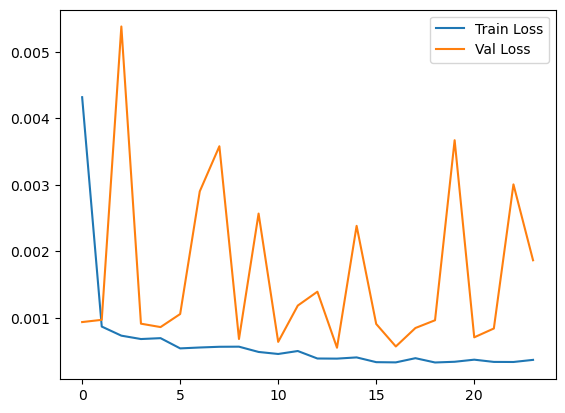

In [29]:
# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

# Optional: Visualize the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [34]:
# Get the models predicted price values
predictions = model.predict(x_test)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


0.14341203200817312

In [35]:
predictions = scaler.inverse_transform(predictions)     # As the model was trained on scaled data so the output predictions are also in that scaled range, this line reverses the scaling transformation.

C:\Users\RohithSai\AppData\Local\Temp\ipykernel_20204\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


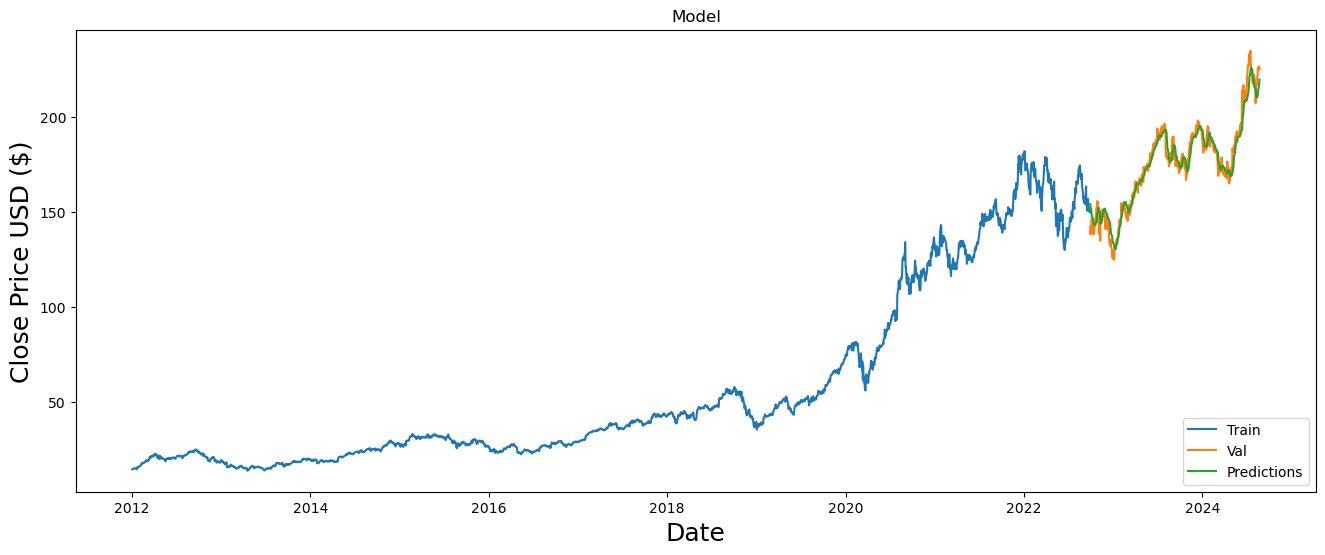

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-09-29,142.479996,154.089844
2022-09-30,138.199997,152.933838
2022-10-03,142.449997,151.140045
2022-10-04,146.100006,149.482803
2022-10-05,146.399994,148.355133
...,...,...
2024-08-16,226.050003,213.791336
2024-08-19,225.889999,215.459000
2024-08-20,226.509995,217.044052


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Calculate the R2 score
r2 = r2_score(actual, predictions)

print("R2 score:", r2)